# Convolución

La convolución para funciones continuas se define como:
$$(f\star g)(t)=\int\limits_{-\infty}^{\infty}f(\ell)g(t-\ell)\,d\ell$$
esta operación se puede usar para **sumar variables aleatorias**. Donde $f$ y $g$ corresponden a las funciones de densidad de variables aleatorias.

Para este ejemplo sumaremos 2 variables aleatorias $U(0,1)$, es decir $Z=X+Y$ donde $X,Y\sim U(0,1)$.

Importamos 2 bibliotecas importantes: `numpy` y `matplotlib`. El primero sirve para hacer cálculos numéricos de manera rápida y el segundo para graficar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Implementamos un método numérico (obtenido de [este link](https://blog.espol.edu.ec/analisisnumerico/regla-del-trapecio/)) para calcular las áreas debajo de una curva.

In [2]:
def integratrapecio_fi(xi, fi):#fi son las y
    ''' sobre muestras de fi para cada xi
        integral con método de trapecio
    '''
    n = len(xi)
    suma = 0
    for i in range(0,n-1,1):
        dx = xi[i+1]-xi[i]
        untrapecio = dx*(fi[i+1]+fi[i])/2
        suma = suma + untrapecio
    return(suma)


Definimos la función de densidad de una $U(0,1)$

In [3]:
def unif(x):
    if 0<=x<=1:
        return 1
    else:
        return 0
unif = np.vectorize(unif) 

Ya definidas la función de densidad, programaremos la convolución usando las funciones anteriores.

Una vez obtenidos los resultados numéricos procederemos a graficar la función de densidad resultante.

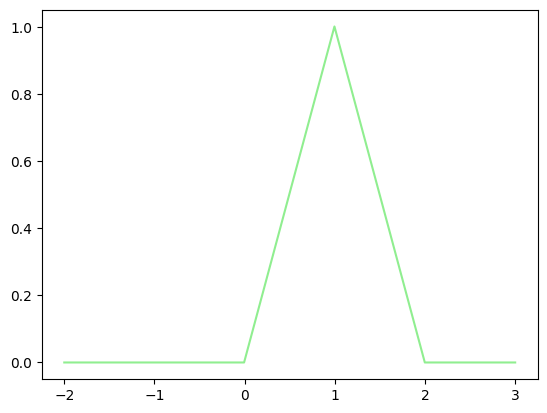

In [4]:
#Primero las funciones y luego la integración y graficación
X = np.linspace(-2, 3, 500)

def uno_conv(t, dom=X):
    Y = unif(dom)*unif(t-dom) #cambiando X por dom
    return integratrapecio_fi(dom, Y)

uno_conv = np.vectorize(uno_conv) #Se vectoriza para poder aprovechar las facilidades de numpy

Y = uno_conv(X)

plt.plot(X, Y, color="lightgreen")
plt.show()

Vemos que la función de densidad coincide con una función de densidad triangular, que era lo que se esperaba.

In [5]:
#Comprobamos que sea función de densidad

print(integratrapecio_fi(X, Y))

1.0040120320801922


Por último verificamos que el área bajo la curva es muy cercano a 1, lo que indica que para este ejemplo la suma de variables aleatorias dio como resultado otra variable aleatoria.